# Выбор локации для скважины

Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Задача построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски.
Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

Импортируем нужные библиотеки

In [1]:
import pandas as df

line = '-'*127

import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

import warnings

warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error

import numpy as np

state = np.random.RandomState(12345)

<div style="border:solid black 1px; padding: 10px">
Сохраняем файл '/datasets/geo_data_0.csv' в переменную 'region_1' выводим первые пять строк и информацию о датафрейме.

In [2]:
region_1 = df.read_csv('/datasets/geo_data_0.csv')
print(region_1.head())
print(line)
print(region_1.info())
print(line)
print(f'Количество дубликатов - {region_1.duplicated().sum()}')

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
-------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
-------------------------------------------------------------------------------------------------------------------------------

<div style="border:solid black 1px; padding: 10px">
Таблица region_1 имеет 100000 строк и 5 столбцов, пропусков нет.

<div style="border:solid black 1px; padding: 10px">
Сохраняем файл '/datasets/geo_data_1.csv' в переменную 'region_2' выводим первые пять строк и информацию о датафрейме.

In [3]:
region_2 = df.read_csv('/datasets/geo_data_1.csv')
print(region_2.head())
print(line)
print(region_2.info())
print(line)
print(f'Количество дубликатов - {region_2.duplicated().sum()}')

      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
-------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
-------------------------------------------------------------------------------------------------------------------

<div style="border:solid black 1px; padding: 10px">
Таблица region_2 имеет 100000 строк и 5 столбцов, пропусков нет.

<div style="border:solid black 1px; padding: 10px">
Сохраняем файл '/datasets/geo_data_2.csv' в переменную 'region_3' выводим первые пять строк и информацию о датафрейме.

In [4]:
region_3 = df.read_csv('/datasets/geo_data_2.csv')
print(region_3.head())
print(line)
print(region_3.info())
print(line)
print(f'Количество дубликатов - {region_3.duplicated().sum()}')

      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746
-------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
-------------------------------------------------------------------------------------------------------------------------------

<div style="border:solid black 1px; padding: 10px">
Таблица region_1 имеет 100000 строк и 5 столбцов, пропусков и жубликатов нет.

<div style="border:solid black 1px; padding: 10px">
Построим графики для понимаения объема во всех 3х таблицах.

In [5]:
def data_analysis (variable, column):
    means = variable[column].mean()
    medians = variable[column].median()
    sns.set()
    f, axes = plt.subplots(1, 2, figsize=(16, 4))
    axes[0].axvline(x=means, color='green')
    axes[0].axvline(x=medians, color='red')
    axes[0].legend(['Среднее значение - {:.2f}'.format(means),
                  'Медианное значение - {:.2f}'.format(medians)])
    axes[0].set_title(f'Гистограмма для - {column}', fontsize=15)
    axes[0].set_ylabel('Количество', fontsize=10)
    sns.histplot(variable, bins=20, kde=True, ax=axes[0], x=column)
    axes[1].set_title(f'График ящик с усами для - {column}', fontsize=15)
    sns.boxplot(data=variable, ax=axes[1], y=column)
    axes[1].set_ylabel(column, fontsize=10)
    plt.show()

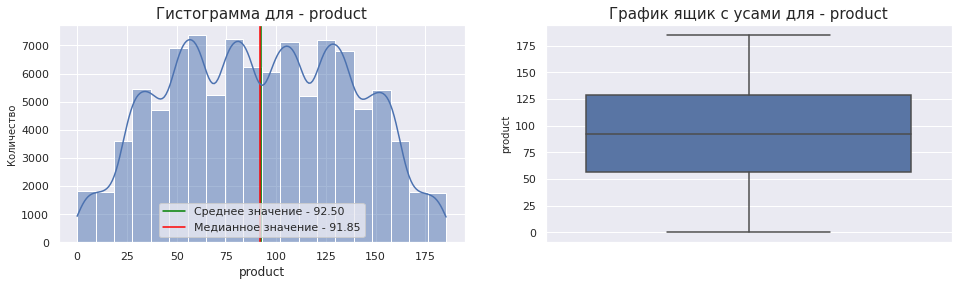

-------------------------------------------------------------------------------------------------------------------------------


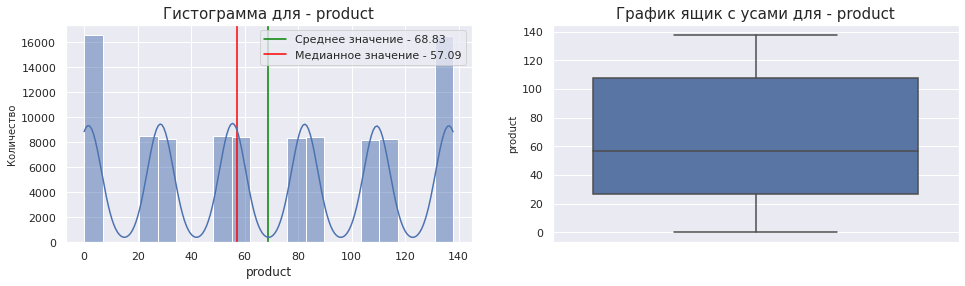

-------------------------------------------------------------------------------------------------------------------------------


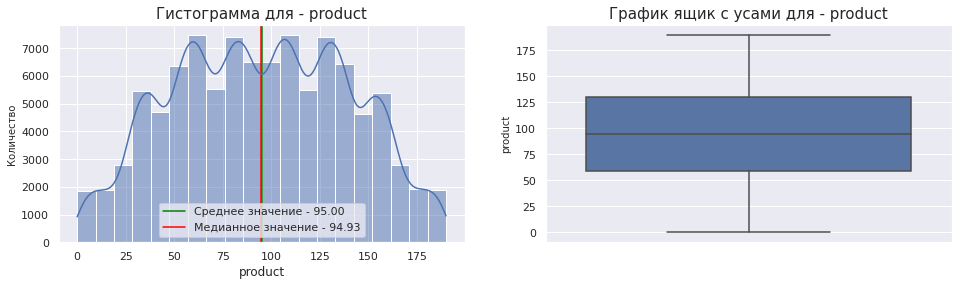

In [6]:
data_analysis(region_1, 'product')
print(line)
data_analysis(region_2, 'product')
print(line)
data_analysis(region_3, 'product')

<div style="border:solid black 1px; padding: 10px">
Данные таблицы 'region_1' и 'region_3' очень похожи между собой так-же у эти регионов среднее и медиана мало различаются, 'region_2' очень отличается от двух остальных видно что в этом регионе запас нефти гораздо меньше. 

<div style="border:solid black 1px; padding: 10px">
Построим корреляцию для таблиц.

In [7]:
def correlation(dataframe):
    print(dataframe.corr())
    print(line)
    plt.figure(figsize=(12,12))
    sns.heatmap(dataframe.corr(), annot=True, fmt='.2f')

               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000
-------------------------------------------------------------------------------------------------------------------------------


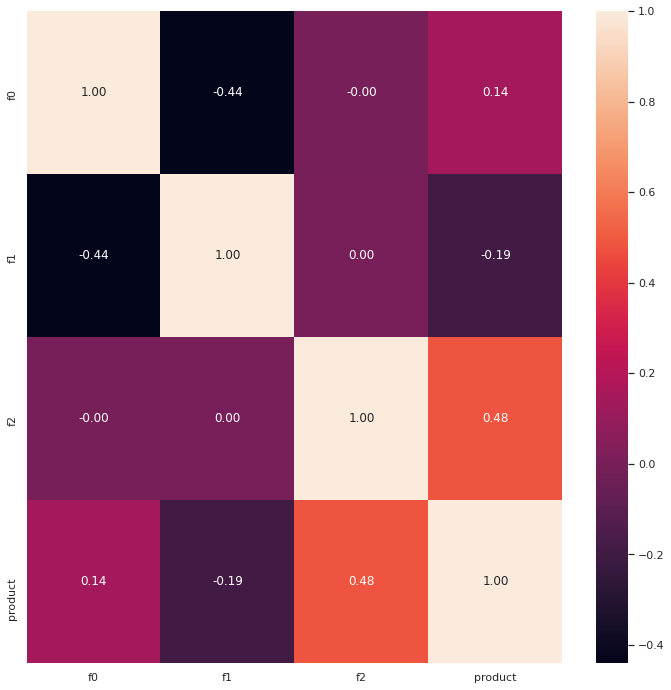

In [8]:
correlation(region_1)

               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000
-------------------------------------------------------------------------------------------------------------------------------


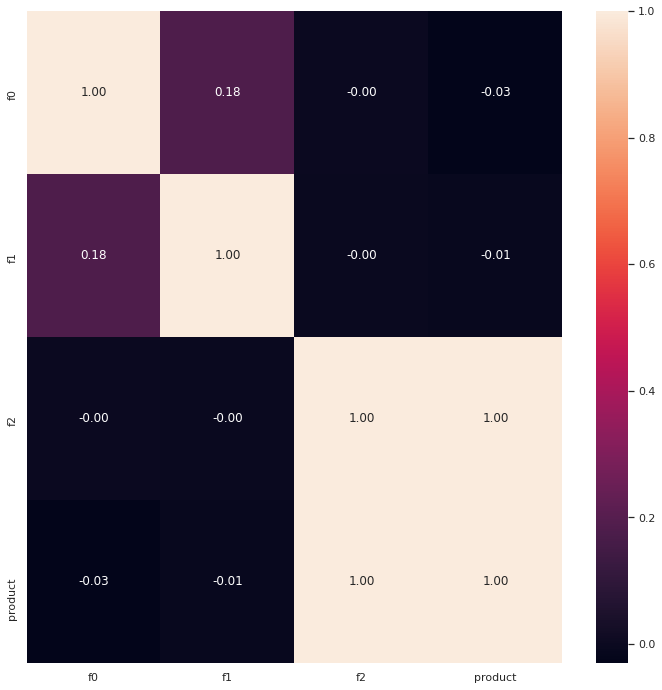

In [9]:
correlation(region_2)

               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000
-------------------------------------------------------------------------------------------------------------------------------


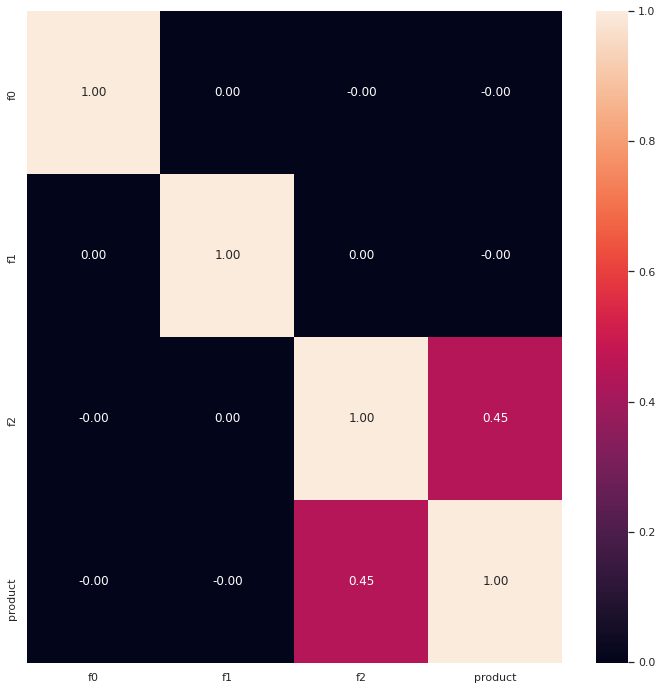

In [10]:
correlation(region_3)

<div style="border:solid black 1px; padding: 10px">
Во всех трех таблицах на целевой признак лучше всего влияет столбец 'f2'

<div style="border:solid black 1px; padding: 10px">
<b>Вывод:</b>
<br>Были созданы 3 таблицы
<br>1 - 'region_1'
<br>1 - 'region_2'
<br>1 - 'region_3'
<br>Пропусков в таблицах нет.
<br>Были построены грайики для таблиц. Регион с самым меньшим запасом сырья является 'region_2'
<br>Согласно корреляции во всех трех таблицах на целевой признак лучше всего влияет столбец 'f2'

## Обучение и проверка модели

<div style="border:solid black 1px; padding: 10px">
Создадим функцию для предсказания и вывода данных.

In [11]:
def Linearregression (dataframe):
    X = dataframe.drop(columns=['product', 'id'])
    y = dataframe['product']
    
    X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)
    
    model_lr = LinearRegression()
    model_lr.fit(X_train, y_train)
    
    predictions = model_lr.predict(X_test)
    
    X_test['product'] = y_test
    X_test['product_pred'] = predictions
    
    average_predicted = X_test['product_pred'].mean()
    rmse = mean_squared_error(y_test, predictions, squared=False)
    
    print(f'Средний запас предсказанного сырья - {average_predicted}')
    print(line)
    print(f'RMSE - {rmse}')
    return X_test

<div style="border:solid black 1px; padding: 10px">
Создадим валидационную выборку из 'region_1' сделаем на ней предсказания и сохраним в переменной 'region_1_valid'. Выведем данные среднего запаса и RMSE

In [12]:
region_1_valid = Linearregression(region_1)
print(line)
region_1_valid.head()

Средний запас предсказанного сырья - 92.39879990657768
-------------------------------------------------------------------------------------------------------------------------------
RMSE - 37.75660035026169
-------------------------------------------------------------------------------------------------------------------------------


,f0,f1,f2,product,product_pred
75721,0.599283,-0.557623,2.121187,122.073350,101.901017
80184,0.739017,-0.463156,-1.347584,48.738540,78.217774
19864,1.422743,-0.534917,3.718798,131.338088,115.266901
76699,1.580244,-0.238458,2.805149,88.327757,105.618618
92991,0.918974,0.023961,2.598575,36.959266,97.980185


<div style="border:solid black 1px; padding: 10px">
Создадим валидационную выборку из 'region_2' сделаем на ней предсказания и сохраним в переменной 'region_2_valid'. Выведем данные среднего запаса и RMSE

In [13]:
region_2_valid = Linearregression(region_2)
print(line)
region_2_valid.head()

Средний запас предсказанного сырья - 68.71287803913762
-------------------------------------------------------------------------------------------------------------------------------
RMSE - 0.890280100102884
-------------------------------------------------------------------------------------------------------------------------------


,f0,f1,f2,product,product_pred
75721,6.078076,0.084568,0.002957,0.000000,0.844738
80184,16.462386,2.712946,1.993030,53.906522,52.921612
19864,7.051898,0.766983,4.990194,134.766305,135.110385
76699,-0.240045,-0.380804,3.999693,107.813044,109.494863
92991,13.350111,-8.558281,0.002010,0.000000,-0.047292


<div style="border:solid black 1px; padding: 10px">
Создадим валидационную выборку из 'region_3' сделаем на ней предсказания и сохраним в переменной 'region_3_valid'. Выведем данные среднего запаса и RMSE

In [14]:
region_3_valid = Linearregression(region_3)
print(line)
region_3_valid.head()

Средний запас предсказанного сырья - 94.77102387765939
-------------------------------------------------------------------------------------------------------------------------------
RMSE - 40.145872311342174
-------------------------------------------------------------------------------------------------------------------------------


,f0,f1,f2,product,product_pred
75721,2.111118,-1.679773,3.112240,117.441301,98.301916
80184,0.734759,0.747788,3.670879,47.841249,101.592461
19864,-2.513109,0.844631,-4.922889,45.883483,52.449099
76699,-2.035301,-1.522988,5.072839,139.014608,109.922127
92991,2.744145,1.429952,-1.372661,84.004276,72.411847


<div style="border:solid black 1px; padding: 10px">
<b>Вывод:</b>
<br>Лучшее RMSE у region_1 - 37 
<br>Самый большой средний запас сырья у region_3 - 94.7

## Подготовка к расчёту прибыли

<div style="border:solid black 1px; padding: 10px">
Сохраним ключевые значения в отдельных перменных

In [15]:
budget = 10000000000

best_points = 200 

income = 450000

selected = 500

<div style="border:solid black 1px; padding: 10px">
Создадим функцию для расчета безубыточной разработки, среднего значения скважин, разницы и количества подходящих скважин

In [16]:
def payback_period (dataframe, number):
    payback = (budget / best_points) / income
    average = dataframe.mean()
    difference = payback - average
    print(f'Достаточный объём сырья для безубыточной разработки новой скважины - {payback}')
    print(line)
    print(f'Среднее значение скважин region_{number} - {average}')
    print(line)
    print(f'Разница между средним значением в region_{number} и достаточным объемом сырья - {difference}')
    print(line)
    print(f'Количество скважин которые больше или равны безубыточного объема - {sum(dataframe >= payback)}')

<div style="border:solid black 1px; padding: 10px">
Применим функцию payback_period к region_1

In [17]:
payback_period(region_1_valid['product_pred'], 1)

Достаточный объём сырья для безубыточной разработки новой скважины - 111.11111111111111
-------------------------------------------------------------------------------------------------------------------------------
Среднее значение скважин region_1 - 92.39879990657768
-------------------------------------------------------------------------------------------------------------------------------
Разница между средним значением в region_1 и достаточным объемом сырья - 18.712311204533435
-------------------------------------------------------------------------------------------------------------------------------
Количество скважин которые больше или равны безубыточного объема - 5258


<div style="border:solid black 1px; padding: 10px">
Применим функцию payback_period к region_2

In [18]:
payback_period(region_2_valid['product_pred'], 2)

Достаточный объём сырья для безубыточной разработки новой скважины - 111.11111111111111
-------------------------------------------------------------------------------------------------------------------------------
Среднее значение скважин region_2 - 68.71287803913762
-------------------------------------------------------------------------------------------------------------------------------
Разница между средним значением в region_2 и достаточным объемом сырья - 42.39823307197349
-------------------------------------------------------------------------------------------------------------------------------
Количество скважин которые больше или равны безубыточного объема - 4520


<div style="border:solid black 1px; padding: 10px">
Применим функцию payback_period к region_3

In [19]:
payback_period(region_3_valid['product_pred'], 3)

Достаточный объём сырья для безубыточной разработки новой скважины - 111.11111111111111
-------------------------------------------------------------------------------------------------------------------------------
Среднее значение скважин region_3 - 94.77102387765939
-------------------------------------------------------------------------------------------------------------------------------
Разница между средним значением в region_3 и достаточным объемом сырья - 16.340087233451726
-------------------------------------------------------------------------------------------------------------------------------
Количество скважин которые больше или равны безубыточного объема - 5239


<div style="border:solid black 1px; padding: 10px">
<b>Вывод:</b>
<br>Достаточный объём сырья для безубыточной разработки новой скважины - 111
<br>Самый большой средний запас сырья у region_3 - 94.7
<br>Меньшая разница между средним значением и достаточным объемом сырья у region_3 - 16.3
<br>Количество скважин которые больше или равны безубыточного объема у region_1 - 4520

## Расчёт прибыли и рисков 

<div style="border:solid black 1px; padding: 10px">
Создадим функцию для расчета прибыли

In [20]:
def profit_calculation(dataframe, number):
    payback = (budget / best_points) / income
    best = dataframe[dataframe['product_pred'] >= payback]
    summ = best['product'].sum()
    profit = summ*income
    profits = profit - budget
    dataframe['profit_well'] = dataframe['product']*income
    print(f'Сумма целевого значения объёма сырья для region_{number} - {summ}')
    print(line)
    print(f'Сумма прибыли для region_{number} - {profit}')
    print(line)
    print(f'Сумма чистой прибыли для region_{number} - {profits}')
    return dataframe

<div style="border:solid black 1px; padding: 10px">
Применим функцию profit_calculation к region_1

In [21]:
region_1_valid = profit_calculation(region_1_valid, 1)
print(line)
region_1_valid.head()

Сумма целевого значения объёма сырья для region_1 - 654176.1715377384
-------------------------------------------------------------------------------------------------------------------------------
Сумма прибыли для region_1 - 294379277191.9823
-------------------------------------------------------------------------------------------------------------------------------
Сумма чистой прибыли для region_1 - 284379277191.9823
-------------------------------------------------------------------------------------------------------------------------------


,f0,f1,f2,product,product_pred,profit_well
75721,0.599283,-0.557623,2.121187,122.073350,101.901017,5.493301e+07
80184,0.739017,-0.463156,-1.347584,48.738540,78.217774,2.193234e+07
19864,1.422743,-0.534917,3.718798,131.338088,115.266901,5.910214e+07
76699,1.580244,-0.238458,2.805149,88.327757,105.618618,3.974749e+07
92991,0.918974,0.023961,2.598575,36.959266,97.980185,1.663167e+07


<div style="border:solid black 1px; padding: 10px">
Применим функцию profit_calculation к region_2

In [22]:
region_2_valid = profit_calculation(region_2_valid, 2)

Сумма целевого значения объёма сырья для region_2 - 606279.60432903
-------------------------------------------------------------------------------------------------------------------------------
Сумма прибыли для region_2 - 272825821948.0635
-------------------------------------------------------------------------------------------------------------------------------
Сумма чистой прибыли для region_2 - 262825821948.0635


<div style="border:solid black 1px; padding: 10px">
Применим функцию profit_calculation к region_3

In [23]:
region_3_valid = profit_calculation(region_3_valid, 3)
print(line)
region_3_valid.head()

Сумма целевого значения объёма сырья для region_3 - 644810.4682064274
-------------------------------------------------------------------------------------------------------------------------------
Сумма прибыли для region_3 - 290164710692.89233
-------------------------------------------------------------------------------------------------------------------------------
Сумма чистой прибыли для region_3 - 280164710692.89233
-------------------------------------------------------------------------------------------------------------------------------


,f0,f1,f2,product,product_pred,profit_well
75721,2.111118,-1.679773,3.112240,117.441301,98.301916,5.284859e+07
80184,0.734759,0.747788,3.670879,47.841249,101.592461,2.152856e+07
19864,-2.513109,0.844631,-4.922889,45.883483,52.449099,2.064757e+07
76699,-2.035301,-1.522988,5.072839,139.014608,109.922127,6.255657e+07
92991,2.744145,1.429952,-1.372661,84.004276,72.411847,3.780192e+07


<div style="border:solid black 1px; padding: 10px">
Создадим функцию для подсчета рисков

In [24]:
def revenu(target, predictions, count):
    
    target = target.reset_index(drop=True)# Ни интернет Ни куратор не смогли мне точно ответить что ты от меня хочешь....... Я больше вообще не знаю куда применять этот reset_index ибо если его применять не в этоцй функции а в функции bootstrap то все равно срабатывает твоя 'печать'.... Даже если я обновлю индекса в датасетах отдельно от фенкций, угадай что... Ни в обучении и вооооооообще нигде не было про такое сказано а где про это почитать я вообще не знаю.
    predictions = predictions.reset_index(drop=True)
    
    predictions_sorted = predictions.sort_values(ascending=False)
    selected = target[predictions_sorted.index][:count]



    # КОД РЕВЬЮЕРА, debug
    if target[predictions_sorted.index].shape[0] != predictions_sorted.shape[0]:
        print(f"Shape mismatch! You took {target[predictions_sorted.index].shape[0]} target values!")


    return income * selected.sum() - budget

def bootstrap(target,namber):
    predictions = target['product_pred']
    target = target['product'] 
    
    values = []
    for i in range(1000):
        target_materials  = target.sample(selected, replace=True, random_state=state)
        predictions_materials = predictions[target_materials.index]
        
        values.append(revenu(target_materials, predictions_materials, best_points))
        
    values = df.Series(values)
    mean = values.mean()
    interval = (values.quantile(0.025), values.quantile(0.975))
    lower = values.quantile(0.025)
    risk = (values < 0).mean()
    
    values.hist(figsize=(15, 6), bins=50)
    plt.grid(True)
    plt.axvline(values.quantile(0.025),linewidth = 2, linestyle ="--", color='green')
    plt.axvline(values.quantile(0.975),linewidth = 2, linestyle ="--", color='red')
    plt.legend(['Нижняя граница 95%-го доверительного интервала', 
                'Верхняя граница 95%-го доверительного интервала', 
                f'Распределение прибыли для region_{namber}'])
    plt.xlabel('Прибыль')
    plt.ylabel('Количество скважин из 200')
    plt.title(f'Распределение прибыли для region_{namber}')
    plt.show()
    print(line)
    print(f'Средняя прибыль с region_{namber} - {mean}')
    print(line)
    print(f'Доверительный интервал для region_{namber} - {interval}')
    print(line)
    print(f'25% квантиль для region_{namber} - {lower}')
    print(line)
    print('Риск для region_',namber,'{:.2%}'.format(risk))

<div style="border:solid black 1px; padding: 10px">
Применим функцию bootstrap к region_1

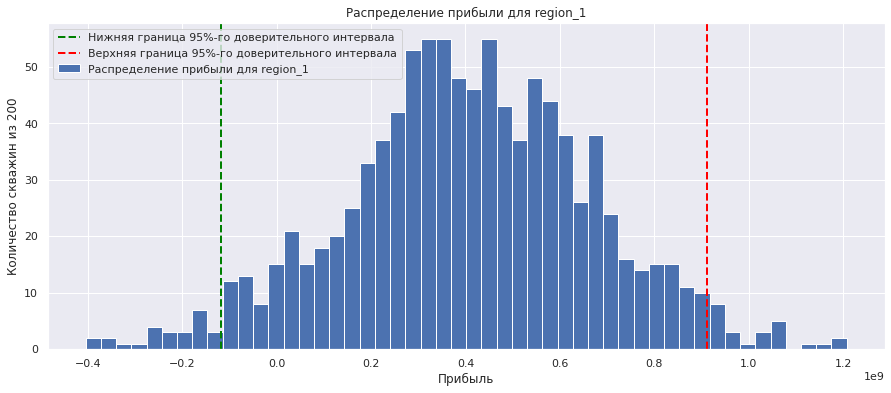

-------------------------------------------------------------------------------------------------------------------------------
Средняя прибыль с region_1 - 406278783.42441905
-------------------------------------------------------------------------------------------------------------------------------
Доверительный интервал для region_1 - (-117742136.49486831, 911737050.7514055)
-------------------------------------------------------------------------------------------------------------------------------
25% квантиль для region_1 - -117742136.49486831
-------------------------------------------------------------------------------------------------------------------------------
Риск для region_ 1 6.70%


In [27]:
bootstrap(region_1_valid,1)

<div style="border:solid black 1px; padding: 10px">
Применим функцию bootstrap к region_2

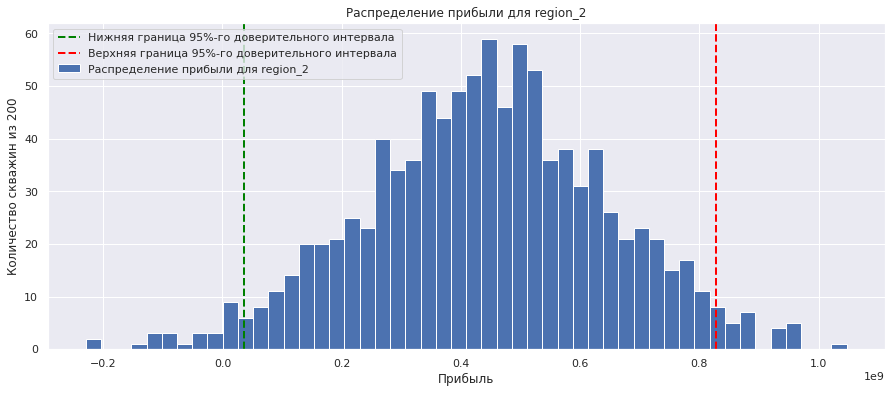

-------------------------------------------------------------------------------------------------------------------------------
Средняя прибыль с region_2 - 441504277.5922549
-------------------------------------------------------------------------------------------------------------------------------
Доверительный интервал для region_2 - (35728489.280851334, 828006639.0043902)
-------------------------------------------------------------------------------------------------------------------------------
25% квантиль для region_2 - 35728489.280851334
-------------------------------------------------------------------------------------------------------------------------------
Риск для region_ 2 1.60%


In [28]:
bootstrap(region_2_valid,2)

<div style="border:solid black 1px; padding: 10px">
Применим функцию bootstrap к region_3

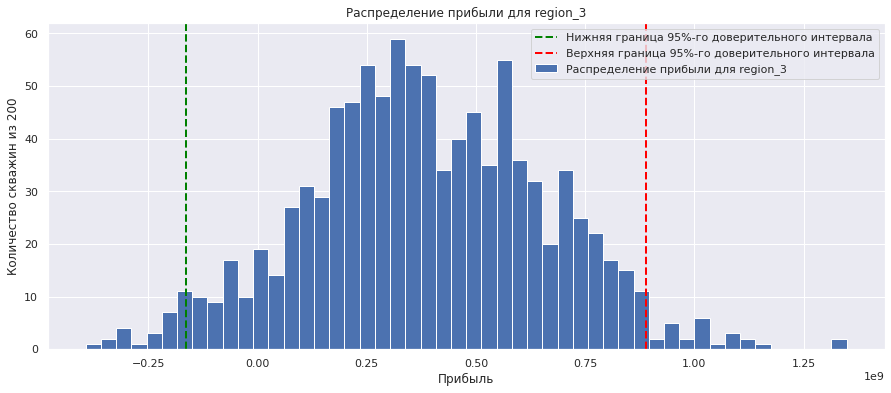

-------------------------------------------------------------------------------------------------------------------------------
Средняя прибыль с region_3 - 385213195.91415244
-------------------------------------------------------------------------------------------------------------------------------
Доверительный интервал для region_3 - (-164785166.1090443, 888206234.1976783)
-------------------------------------------------------------------------------------------------------------------------------
25% квантиль для region_3 - -164785166.1090443
-------------------------------------------------------------------------------------------------------------------------------
Риск для region_ 3 7.80%


In [29]:
bootstrap(region_3_valid,3)

<div style="border:solid black 1px; padding: 10px">
<b>Вывод:</b>
<br>Лучшая сумма целевого значения объёма сырья у region_1 - 654176.1715377384
<br>Лушая сумма прибыли у region_1 - 294379277191.9823
<br>Лучшая сумма чистой прибыли у region_1 - 284379277191.9823
<br>Лучшая средняя прибыль у region_2 - 441504277.5922549
<br>Самый высокий 25% квантиль у region_2 - 35728489.280851334
<br>Меньший риск у region_2 - 1.60%

<div style="border:solid black 1px; padding: 10px">
<b>Итоговый вывод:</b>
<br>Данные по трем регионам:
<br>    
<b>Регион 1:</b> 
<br>Средний запас предсказанного сырья - 92.39879990657768
<br>Разница между средним значением и достаточным объемом сырья - 18.712311204533435
<br>Количество скважин которые больше или равны безубыточного объема - 5258    
<br>Сумма целевого значения объёма сырья - 654176.1715377384
<br>Сумма прибыли - 294379277191.9823
<br>Сумма чистой прибыли - 284379277191.9823
<br>Средняя прибыль с region_1 - 406278783.42441905
<br>Доверительный интервал для region_1 - (-117742136.49486831, 911737050.7514055)
<br>25% квантиль для region_1 - -117742136.49486831
<br>Риск для region_ 1 6.70%
<br>  
<b>Регион 2:</b> 
<br>Средний запас предсказанного сырья - 68.71287803913762
<br>Разница между средним значением и достаточным объемом сырья - 42.39823307197349
<br>Количество скважин которые больше или равны безубыточного объема - 4520
<br>Сумма целевого значения объёма сырья - 606279.60432903
<br>Сумма прибыли - 272825821948.0635
<br>Сумма чистой прибыли - 262825821948.0635
<br>Средняя прибыль с region_2 - 441504277.5922549
<br>Доверительный интервал для region_2 - (35728489.280851334, 828006639.0043902)
<br>25% квантиль для region_2 - 35728489.280851334
<br>Риск для region_ 2 1.60%
<br>  
<b>Регион 3:</b>
<br>Средний запас предсказанного сырья - 94.77102387765939
<br>Разница между средним значением и достаточным объемом сырья - 16.340087233451726
<br>Количество скважин которые больше или равны безубыточного объема - 5239
<br>Сумма целевого значения объёма сырья - 644810.4682064274
<br>Сумма прибыли - 290164710692.89233
<br>Сумма чистой прибыли - 280164710692.89233
<br>Средняя прибыль с region_3 - 385213195.91415244
<br>Доверительный интервал для region_3 - (-164785166.1090443, 888206234.1976783)
<br>25% квантиль для region_3 - -164785166.1090443
<br>Риск для region_ 3 7.80%   
<br>  
<b>Рекомендация:</b>
<br>Лучше всего для разработки новых кважин выбирать между первым и третим регионом так как они похожи между собой. У них почти одинаковая сумма чистой прибыли и объема срья. Хоть наименьший показатель риска у второго региона, смотря на его расспределение объема сырья и другие показатели он выглядит самым нестабильным.